<a href="https://colab.research.google.com/github/phamvandatspkt/nhandangmonan/blob/main/camxuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


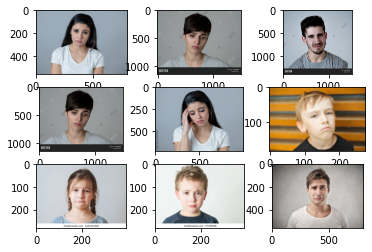

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/emotion/emotion/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'buon' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [5]:
folder = '/content/drive/MyDrive/emotion/emotion/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('buon'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ghetom'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('giandu'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hanhphuc'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('sohai'):
    output = 4
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ngacnhien'):
    output = 5
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)



photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('6emotions_photos.npy', photos)
save('6emotionss_labels.npy', labels)

(78, 150, 150, 3) (78,)


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
3/3 [==============================] - 5s 940ms/step - loss: 1261.9235 - accuracy: 0.0385
Epoch 2/20
3/3 [==============================] - 3s 916ms/step - loss: 1885.3566 - accuracy: 0.1538
Epoch 3/20
3/3 [==============================] - 3s 918ms/step - loss: 283.9182 - accuracy: 0.1538
Epoch 4/20
3/3 [==============================] - 3s 911ms/step - loss: 41.1577 - accuracy: 0.3462
Epoch 5/20
3/3 [==============================] - 3s 911ms/step - loss: 8.2971 - accuracy: 0.4103
Epoch 6/20
3/3 [==============================] - 3s 913ms/step - loss: 3.4705 - accuracy: 0.5641
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.5299 - accuracy: 0.7949
Epoch 8/20
3/3 [==============================] - 3s 915ms/step - loss: 0.2204 - accuracy: 0.9487
Epoch 9/20
3/3 [==============================] - 3s 917ms/step - loss: 0.0862 - accuracy: 0.9872
Epoch 10/20
3/3 [==============================] - 3s 914ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 11/20
3

In [8]:
model.evaluate(photos,labels)

3/3 [==============================] - 2s 276ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0013646134175360203, 1.0]

In [9]:
model.save('camxuc.h5')

In [10]:
classes = ["buon","hanhphuc","ngacnhien","sohai","giandu","ghetom"]

[[0.12239691 0.10198646 0.11089731 0.10363472 0.10861434 0.10080639
  0.09366738 0.08855422 0.08368906 0.08575324]]


'buon'

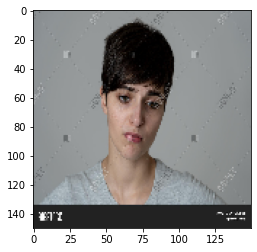

In [16]:
img = load_img('/content/drive/MyDrive/emotion/emotion/buon2.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]